In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import h5py
from collections import defaultdict

%matplotlib inline 
plt.rcParams['figure.figsize'] = [16, 10]

import sys
sys.path.append('/Users/kai/src/psc/python')
import psc

In [2]:
def plot_fields(fldnames, fld_kwargs=None):
    fig, axs = plt.subplots(1, len(fldnames))
    if len(fldnames) == 1: axs = [axs]
    for i, fldname in enumerate(fldnames):
        fld = ds[fldname]
        if fld_kwargs:
            kwargs = fld_kwargs[i]
        else:
            kwargs = {}
        fld[:,:,0].plot(ax=axs[i], **kwargs)
        axs[i].set_aspect('equal')

In [3]:
step = 0
node = 0
ds1 = xr.open_dataset(f"/Users/kai/src/psc/build-mac/pfd.{step:06d}_p{node:06d}.h5", engine='pschdf5')
ds2 = xr.open_dataset(f"/Users/kai/src/psc/build-mac/pfd_moments.{step:06d}_p{node:06d}.h5", engine='pschdf5')
ds = xr.merge([ds1, ds2])
ds

<xarray.Dataset>
Dimensions:   (x: 32, y: 32, z: 32)
Coordinates:
  * x         (x) float32 -4.844 -4.531 -4.219 -3.906 ... 4.219 4.531 4.844
  * y         (y) float32 -4.844 -4.531 -4.219 -3.906 ... 4.219 4.531 4.844
  * z         (z) float32 -4.844 -4.531 -4.219 -3.906 ... 4.219 4.531 4.844
Data variables: (12/35)
    ex_ec     (x, y, z) float32 ...
    ey_ec     (x, y, z) float32 ...
    ez_ec     (x, y, z) float32 ...
    hx_fc     (x, y, z) float32 ...
    hy_fc     (x, y, z) float32 ...
    hz_fc     (x, y, z) float32 ...
    ...        ...
    tyz_e_UP  (x, y, z) float32 ...
    tyz_i_UP  (x, y, z) float32 ...
    tzx_e_UP  (x, y, z) float32 ...
    tzx_i_UP  (x, y, z) float32 ...
    tzz_e_UP  (x, y, z) float32 ...
    tzz_i_UP  (x, y, z) float32 ...

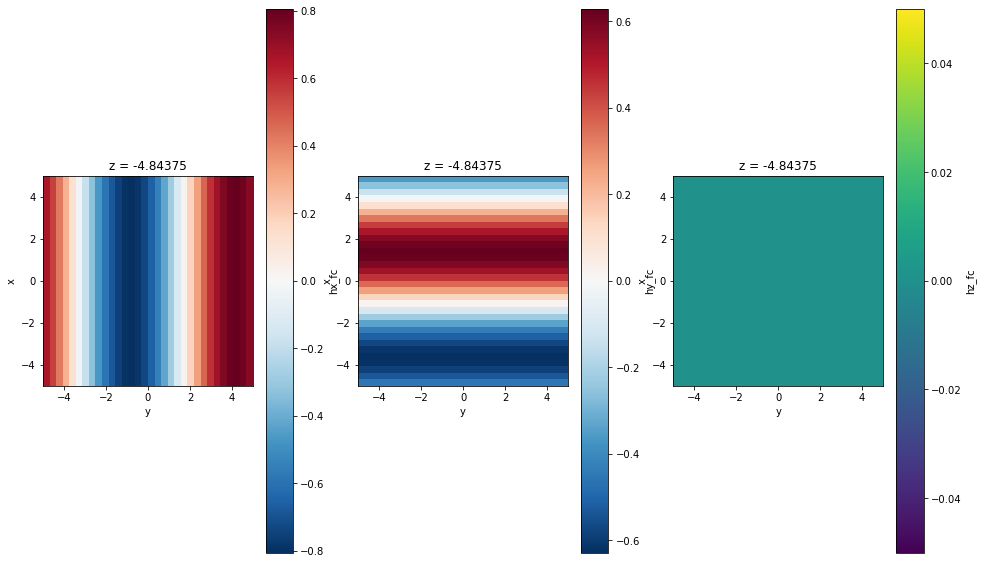

In [4]:
plot_fields(['hx_fc', 'hy_fc', 'hz_fc'])
#            fld_kwargs=[{"vmin": -.0065}, {"vmin": -.02}, {}])

In [5]:
# (B_fc(i,j+1,k) - B_fc(i,j,k))/dy + (B_fc(i,j,k+1) - B_fc(i,j,k))/dz

divB_x = ds.hx_fc[1:,:-1,:-1].data - ds.hx_fc[:-1,:-1,:-1].data
divB_y = ds.hy_fc[:-1,1:,:-1].data - ds.hy_fc[:-1,:-1,:-1].data
divB_z = ds.hz_fc[:-1,:-1,1:].data - ds.hz_fc[:-1,:-1,:-1].data
divB = divB_x + divB_y + divB_z

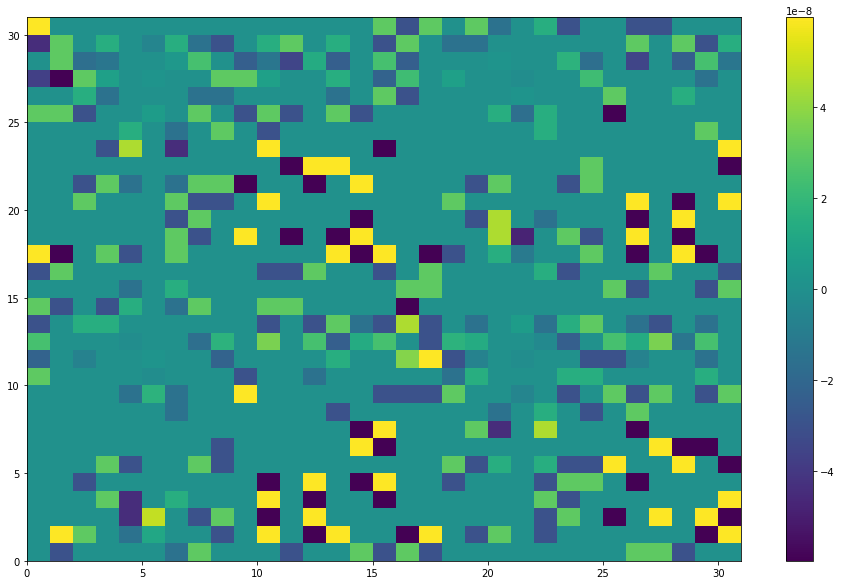

In [6]:
plt.pcolormesh(divB[:,:,0])
plt.colorbar()

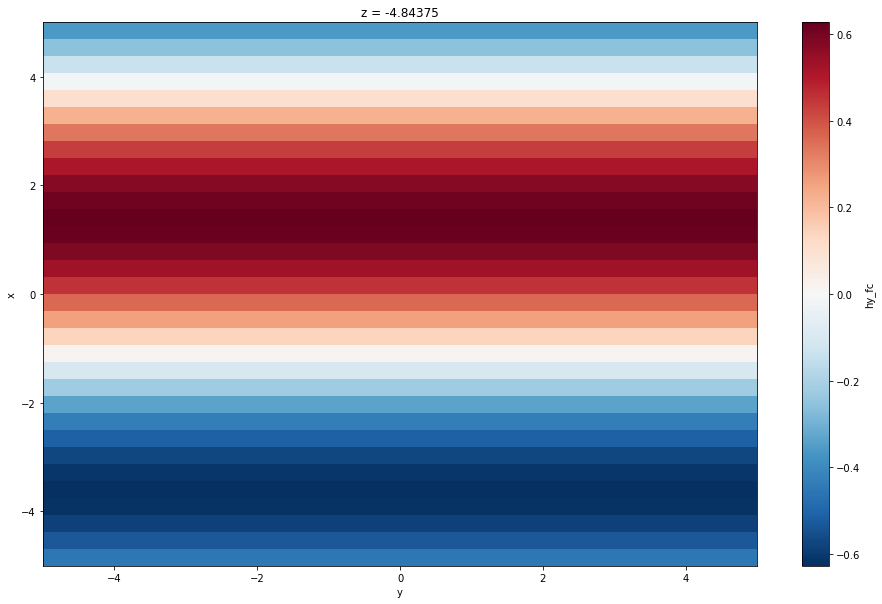

In [7]:
ds.hy_fc[:,:,0].plot()

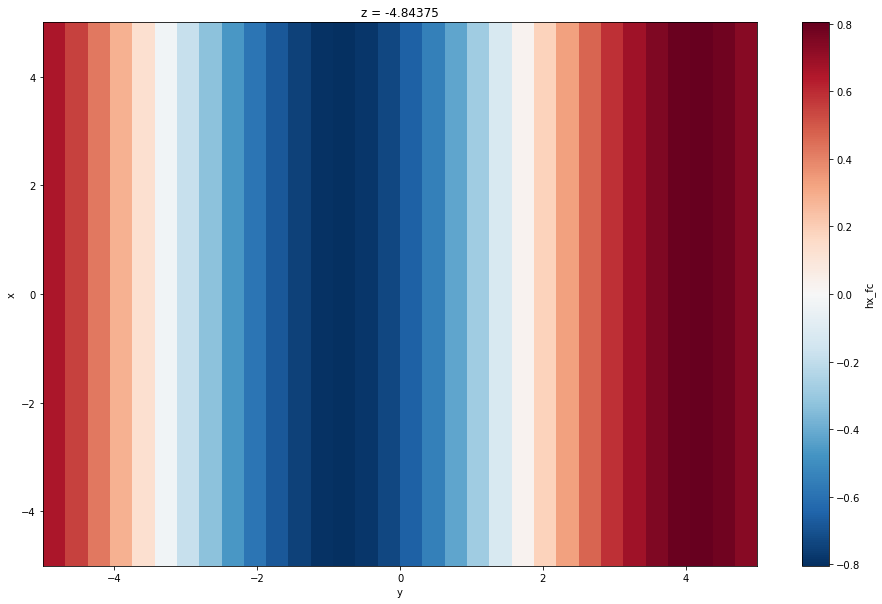

In [8]:
ds.hx_fc[:,:,0].plot()